In [1]:
from scipy.stats import randint
import pandas as pd
from IPython.core.display_functions import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from helper import get_train_test_split_dataset
import graphviz
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz
from baseline_models import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_confusion_matrix(y_test_, y_prediction_):
    # Create the confusion matrix
    cm = confusion_matrix(y_test_, y_prediction_)
    # Plot the confusion matrix
    labels = ["Stable", "Slow Decliner", "Fast Decliner"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="GnBu")
    plt.show()

In [3]:
def plot_decision_trees(feature_names, rf_, num_trees=2):
    for i in range(num_trees):
        tree = rf_.estimators_[i]
        dot_data = export_graphviz(
            tree,
            feature_names=feature_names,
            class_names=["Stable", "Slow Decliner", "Fast Decliner"],
            filled=True, rounded=True,
            max_depth=5,
            impurity=False,
            proportion=True,
            out_file=None,  
        )
        graph = graphviz.Source(dot_data, directory="trees")
        graph.render(f'tree_{i}', format='png')
        display(Image(filename=f'trees/tree_{i}.png'))

In [4]:
# Load the dataset
path = "C:/Users/mjgoj/Desktop/THESIS/data/final_dataset_split.xls"
xls = pd.ExcelFile(path)

lipidomics = pd.read_excel(xls, "Lipidomics")
metabolomics = pd.read_excel(xls, "Metabolomics_Pareto_Scaled")
proteomics = pd.read_excel(xls, "Proteomics_Pareto_Scaled")

X_train, X_test, Y_train, y_test = concatenation_integration(
    lipidomics, metabolomics, proteomics
)
X_train_resampled, Y_train_resampled = resampling(X_train, Y_train)

Integrated dataset shape:  (96, 1119)
Training set shape:  (58, 1119)
Testing set shape:  (38, 1119)
Resampled training set shape:  (99, 1116)
Resampled training set class distribution: 
 1    33
2    33
3    33
Name: ThreeClass, dtype: int64


### Training with resampling and Hyperparameter tuning

Best parameters: {'max_depth': 6, 'n_estimators': 451}
[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 2
 3]

Accuracy of the RF model: 0.6578947368421053


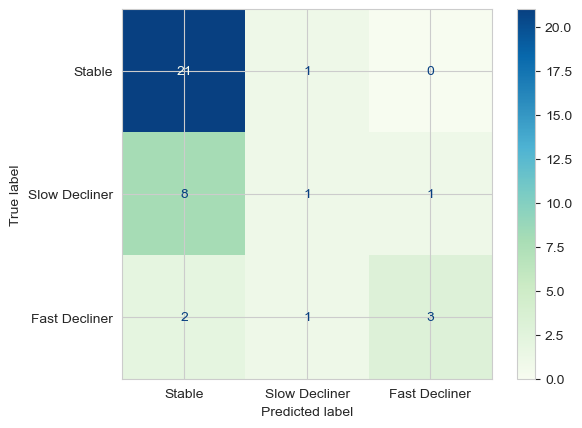

In [5]:
rf_tuning = random_forest(X_train_resampled, Y_train_resampled, True)

# Check the accuracy of the model
y_prediction = rf_tuning.predict(X_test)
print(y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print("\nAccuracy of the RF model: {}".format(accuracy))

plot_confusion_matrix(y_test, y_prediction)

### Training with resampling and NO Hyperparameter tuning

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 2
 3]

Accuracy of the RF model: 0.6842105263157895


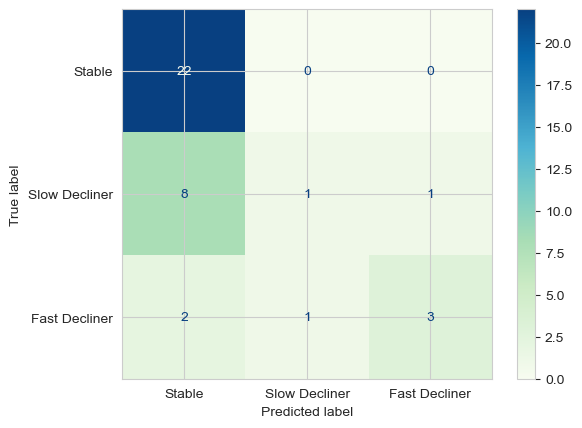

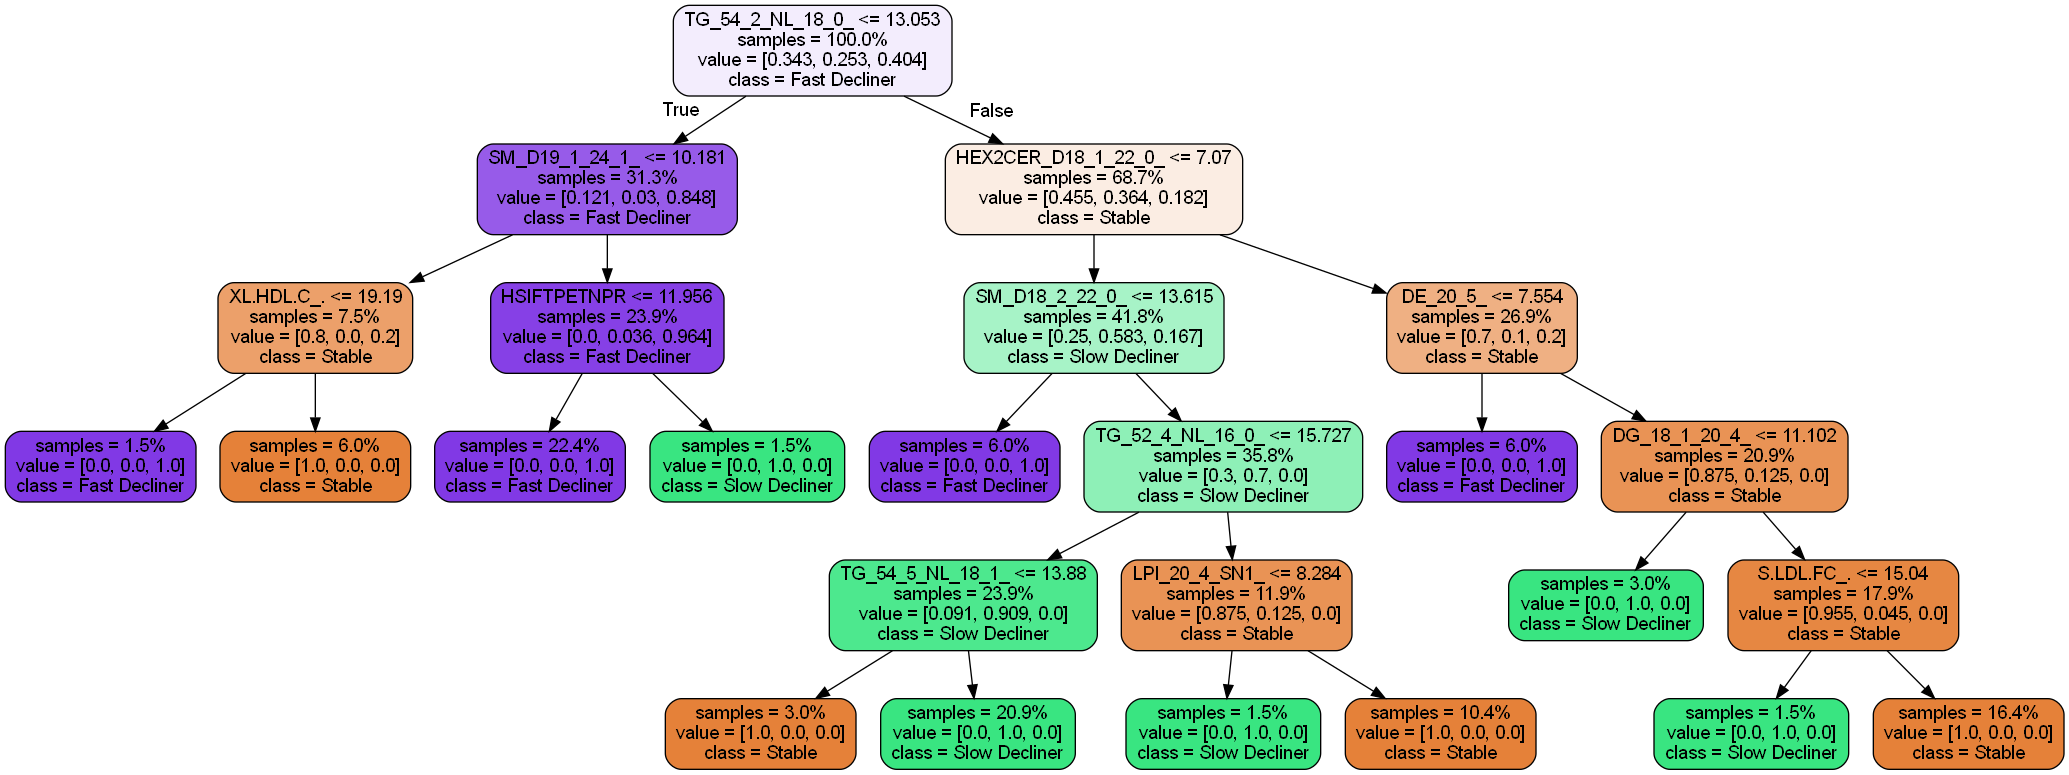

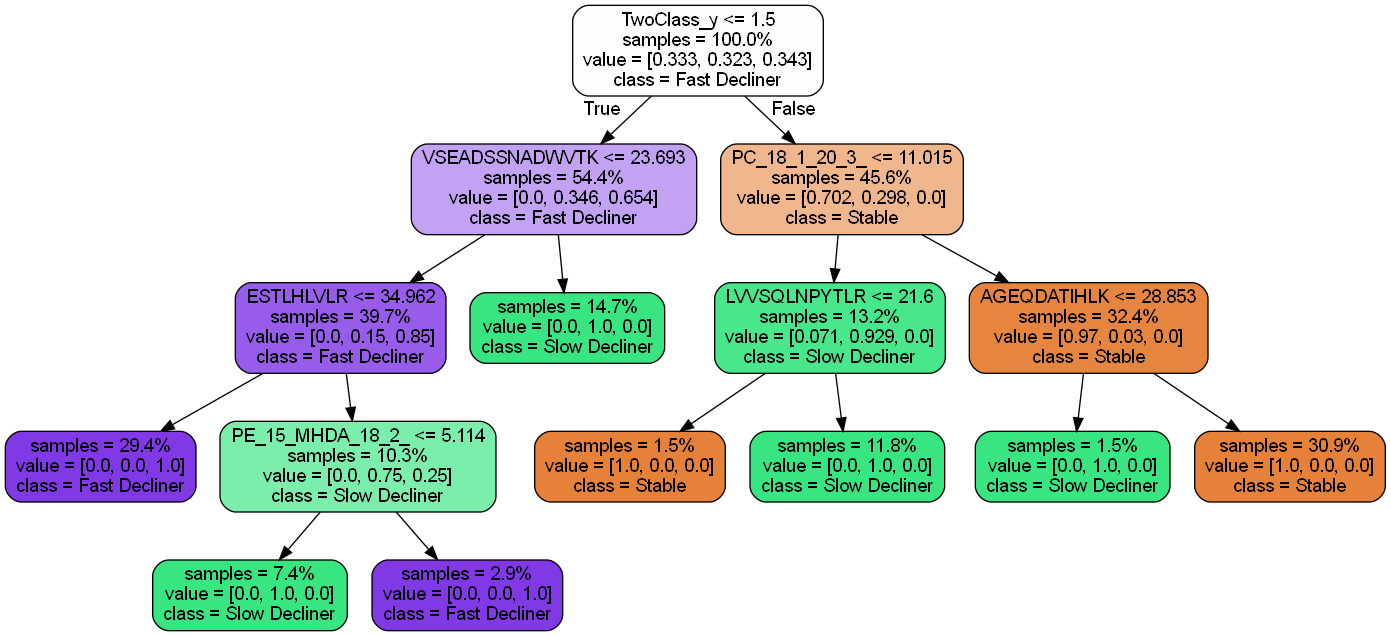

In [6]:
rf = random_forest(X_train_resampled, Y_train_resampled, False)

# Check the accuracy of the model
y_prediction = rf.predict(X_test)
print(y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print("\nAccuracy of the RF model: {}".format(accuracy))

plot_confusion_matrix(y_test, y_prediction)
plot_decision_trees(X_train_resampled.columns, rf, 2)

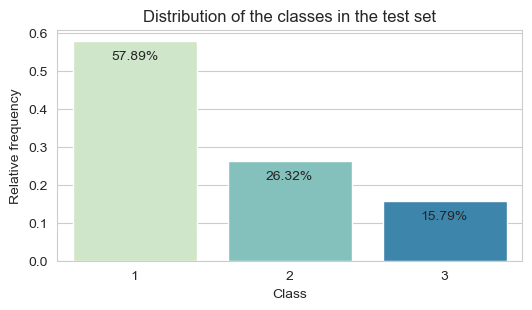

In [7]:
# Plot distribution of the y variable
y_test_count = y_test.value_counts()
# add relative frequency
y_test_count = y_test_count / y_test_count.sum()
plt.figure(figsize=(6, 3))
sns.barplot(x=y_test_count.index, y=y_test_count.values, palette="GnBu")
plt.title("Distribution of the classes in the test set")
plt.ylabel("Relative frequency")
plt.xlabel("Class")
for i in range(len(y_test_count)):
    plt.text(
        x=i,
        y=y_test_count.values[i] - 0.05,
        s=f"{y_test_count.values[i]*100:.2f}%",
        ha="center",
    )
plt.show()

### Testing with resampling of **TESTING data** and NO Hyperparameter tuning


Resampled training set shape:  (66, 1116)
Resampled training set class distribution: 
 2    22
1    22
3    22
Name: ThreeClass, dtype: int64

Accuracy of the RF model: 0.5151515151515151


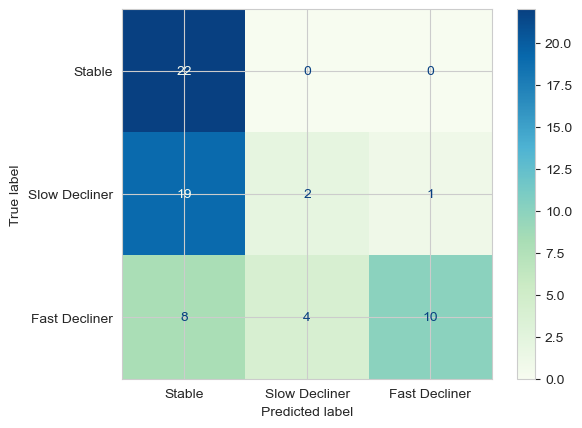

In [8]:
X_test_resampled, y_test_resampled = resampling(X_test, y_test)
y_prediction_resampled = rf.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_prediction_resampled)
print("\nAccuracy of the RF model: {}".format(accuracy_resampled))

plot_confusion_matrix(y_test_resampled, y_prediction_resampled)